In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [3]:
x = np.arange(1,11) * 100
y = 2 * x + np.random.randn(10)*5
X = np.vstack((x,y))
print(X)

[[ 100.          200.          300.          400.          500.
   600.          700.          800.          900.         1000.        ]
 [ 202.97142789  393.3061137   599.95525977  798.68188161 1000.36664445
  1192.89732344 1402.67897193 1593.83015367 1804.52969751 2001.42148051]]


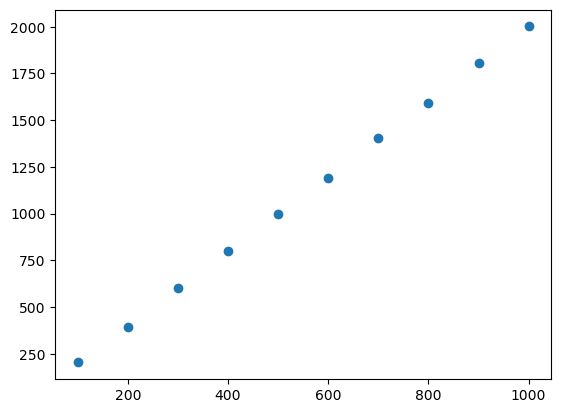

In [4]:
plt.scatter(X[0], X[1])
plt.show()

In [5]:
Xcentered = (X[0] - x.mean(), X[1] - y.mean())
m = (x.mean(), y.mean())
print(Xcentered)
print('Mean vector: ', m)

(array([-450., -350., -250., -150.,  -50.,   50.,  150.,  250.,  350.,
        450.]), array([-896.09246756, -705.75778175, -499.10863568, -300.38201384,
        -98.69725099,   93.83342799,  303.61507648,  494.76625822,
        705.46580206,  902.35758507]))
Mean vector:  (550.0, 1099.0638954480075)


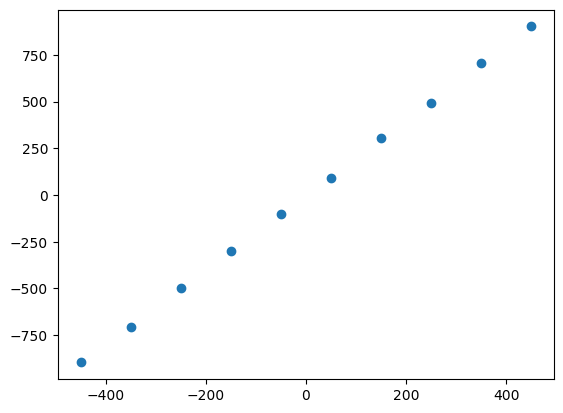

In [6]:
plt.scatter(Xcentered[0], Xcentered[1])
plt.show()

In [7]:
covmat = np.cov(Xcentered)
print(covmat, '\n')
print('Variance of X: ', np.cov(Xcentered)[0,0])
print('Variance of Y: ', np.cov(Xcentered)[1,1])
print('Covariance X and Y: ', np.cov(Xcentered)[0,1])

[[ 91666.66666667 183547.28877613]
 [183547.28877613 367540.81945133]] 

Variance of X:  91666.66666666666
Variance of Y:  367540.8194513317
Covariance X and Y:  183547.2887761342


In [8]:
_, vecs = np.linalg.eig(covmat)
v = -vecs[:,1]
Xnew = np.dot(v, Xcentered)
print(Xnew)

[-1002.73462806  -787.77485808  -558.21947697  -335.75192353
  -110.63789114   106.28650788   338.64435909   554.33460112
   787.51364061  1008.33966907]


In [9]:
v, v.shape

(array([0.44678252, 0.8946426 ]), (2,))

In [10]:
Xcentered

(array([-450., -350., -250., -150.,  -50.,   50.,  150.,  250.,  350.,
         450.]),
 array([-896.09246756, -705.75778175, -499.10863568, -300.38201384,
         -98.69725099,   93.83342799,  303.61507648,  494.76625822,
         705.46580206,  902.35758507]))

In [11]:
vecs[-1]

array([ 0.44678252, -0.8946426 ])

In [12]:
m

(550.0, 1099.0638954480075)

In [14]:
n = 5
Xrestored = np.dot(Xnew[n],v) + m
print('Restored: ', Xrestored)
print('Original: ', X[:,n])

Restored:  [ 597.4869539  1194.15233306]
Original:  [ 600.         1192.89732344]


In [15]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 1)
XPCAreduced = pca.fit_transform(np.transpose(X))

In [19]:
for xn, x_pca in zip(Xnew, XPCAreduced):
    print(xn, '-', x_pca[0], ':', np.abs(xn - x_pca[0]))

-1002.7346280593017 - -1002.7346280593022 : 4.547473508864641e-13
-787.7748580793759 - -787.774858079376 : 1.1368683772161603e-13
-558.2194769732075 - -558.2194769732075 : 0.0
-335.75192353017167 - -335.7519235301717 : 5.684341886080802e-14
-110.63789113717796 - -110.63789113717797 : 1.4210854715202004e-14
106.28650788490737 - 106.28650788490738 : 1.4210854715202004e-14
338.64435909465135 - 338.64435909465146 : 1.1368683772161603e-13
554.3346011220683 - 554.3346011220683 : 0.0
787.5136406084 - 787.5136406084 : 0.0
1008.3396690692083 - 1008.3396690692085 : 2.2737367544323206e-13
